In [1]:
import pandas as pd


pd.read_csv('eval.csv')

,dataset,psnr,ssim,lpips,algo,r,max mem
0,GSO,24.697824,0.856362,0.153131,patch,0.20,1944.306641
1,real,24.241688,0.900117,0.100350,patch,0.20,1672.134277
2,objaverse,22.422012,0.804620,0.183748,patch,0.50,1946.474609
3,GSO,24.595030,0.853178,0.155922,patch,0.50,1946.035645
4,real,24.158966,0.900199,0.101145,patch,0.50,1673.303223
5,objaverse,22.155600,0.799055,0.188762,patch,0.70,1945.338379
6,GSO,24.442621,0.850188,0.158907,patch,0.70,1943.370117
7,real,23.935772,0.899642,0.102694,patch,0.70,1673.779785
8,objaverse,22.255613,0.799588,0.188374,patch,0.90,1944.438477
9,GSO,24.479527,0.849981,0.160561,patch,0.90,1943.214844


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('eval.csv')

<Axes: xlabel='r', ylabel='ssim'>

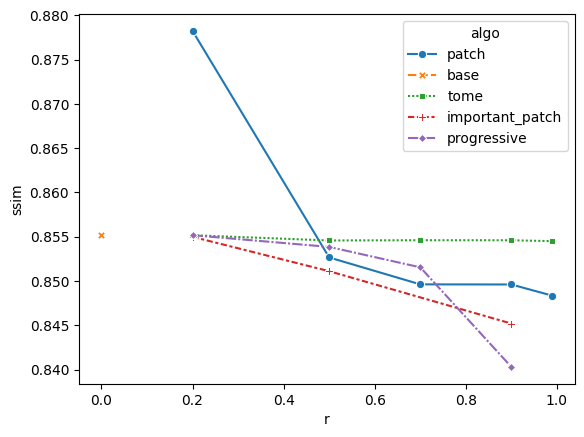

In [3]:
sns.lineplot(data=df, x='r', y='ssim', hue='algo', errorbar=None, markers=True, style='algo')

In [4]:
import pyviz3d as viz

In [6]:
import os
import pyviz3d.visualizer as viz

def visualize_extracted_features(
    coord, colors, normals, segment, pred,
    hooked_layer_names, extracted_features, path):
    
    v = viz.Visualizer()
    
    layer_id = 0
    for module_name, feats in zip(hooked_layer_names, extracted_features):
        
        vertices = feats["coords"].detach().cpu().numpy() 
        vertices -= vertices.mean(0)
        
        for i in range(len(feats["attn_feats"])):
            attn_feat = feats["attn_feats"][i].detach()
            pca_color_attn = get_pca_color(attn_feat.reshape(-1, attn_feat.shape[-1])).squeeze()
            # breakpoint()
            v.add_points(f'feat_{layer_id//4};{layer_id}_attn_{i}', vertices, pca_color_attn, point_size=20, visible=False)
            pass

        segment_colors = segment_color_codes[feats["segment_ids"].cpu().numpy().astype(np.int32)].squeeze()
        
        point_size = 20
        # breakpoint()
        v.add_points(f'feat_{layer_id//4};{layer_id}_segments', vertices, segment_colors, point_size=point_size, visible=False)
        if feats["merged_infos"] is not None:
            for i in range(len(feats["merged_infos"])):
                merged_colors = feats["merged_infos"][i].detach().cpu().numpy()
                merge_colors = (merged_colors * 255).astype(np.uint8)
                v.add_points(f'feat_{layer_id//4};{layer_id}_merge_{i}', vertices, merge_colors, point_size=point_size, visible=False)
            
        layer_id += 1
    
    point_semantic_colors = create_color_palette()[np.array(VALID_CLASS_IDS_20)[pred]]
    gt_semantic_colors = create_color_palette()[np.array(VALID_CLASS_IDS_20)[segment]]
    
    error = (pred != segment) & (segment >= 0)
    error_color = np.zeros_like(coord)
    error_color[error] = np.array([255, 0, 0])

    coord -= coord.mean(0)

    point_colors = ((colors + 1.0) / 2.0) * 255
    point_size = 20
    v.add_points('input', coord, point_colors, point_size=point_size, normals=normals, visible=True)
    v.add_points('pred', coord, point_semantic_colors, point_size=point_size, normals=normals, visible=False)
    v.add_points('gt', coord, gt_semantic_colors, point_size=point_size, normals=normals, visible=False)
    v.add_points('error', coord, error_color, point_size=point_size, normals=normals, visible=False)
    
    viz_path = os.path.join(path)
    v.save(viz_path)

ModuleNotFoundError: No module named 'pointcept.datasets.preprocessing'

In [17]:
import numpy as np
import pyviz3d.visualizer as viz


def test(path):

    # First, we set up a visualizer
    v = viz.Visualizer()

    # Random point clouds.
    for j in range(5):
        i = j + 1
        name = 'Points;'+str(i)
        num_points = 3
        point_positions = np.random.random(size=[num_points, 3])
        point_colors = (np.random.random(size=[num_points, 3]) * 255).astype(np.uint8)
        point_size = 25 * i

        # Here we add point clouds to the visualizer
        v.add_points(name, point_positions, point_colors, point_size=point_size, visible=False)

    # Sample point clouds from the ScanNet dataset.
    for scene_name in ['scene0140_01', 'scene0451_01']:
        scene = np.load(path + scene_name + '.npy')
        point_positions = scene[:, 0:3]
        print(point_positions.shape)
        point_colors = scene[:, 3:6]
        print(point_colors.shape)
        point_size = 30

        # Add more point clouds
        v.add_points(scene_name, point_positions, point_colors, point_size=point_size)

    # When we added everything we need to the visualizer, we save it.
    v.save('test')


test(path='/home/phuc/PyViz3D/examples/data/')


(135046, 3)
(135046, 3)
(107046, 3)
(107046, 3)

************************************************************************
1) Start local server:
    cd /home/phuc/SplatFormer/test; python -m http.server 6008
2) Open in browser:
    http://0.0.0.0:6008
************************************************************************
